# Ch 2 Trends

In [1]:
#A trend is the presence of a long-term increase or decrease in the sequence. 
# Seasonality is a variation that occurs at specific regular intervals of less
# than a year. Seasonality can occur on different time spans such as daily, weekly,
# monthly, or yearly. 
# Cyclic variations are rises and falls that are not of a fixed frequency.
# Time-Series that don't change over time are called stationary (or stationary processes).

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import polyfit

In [3]:
#Dataset from here: https://datahub.io/core/global-temp
temperatures = pd.read_csv('C:/Users/hp/Documents/Data Science/Machine Learning Time-Series book/data/monthly.csv')
temperatures.head()

,Source,Date,Mean
0,GCAG,2016-12-06,0.7895
1,GISTEMP,2016-12-06,0.8100
2,GCAG,2016-11-06,0.7504
3,GISTEMP,2016-11-06,0.9300
4,GCAG,2016-10-06,0.7292


In [ ]:
#GCAG = Global Climate at a Glance
#GISTEMP = Global Surface Temperature

In [4]:
temperatures['Date'] = pd.to_datetime(temperatures['Date'])
temperatures = temperatures.pivot('Date', 'Source', 'Mean')

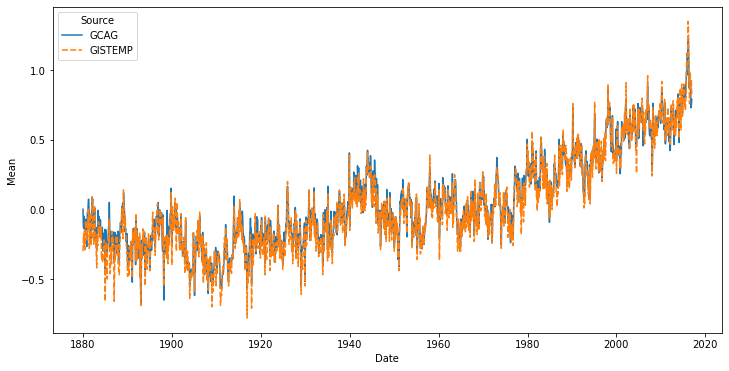

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=temperatures)
plt.ylabel('Mean');

In [17]:
# curve fitting

def fit(X, y, degree=3):
    coef = polyfit(X, y, degree)
    trendpoly = np.poly1d(coef)
    return trendpoly(X)

def get_season(s, yearly_periods=4, degree=3):
    X = [i%(365/4) for i in range(0, len(s))]
    seasonal = fit(X, s.values, degree)
    return pd.Series(data=seasonal, index=s.index)

def get_trend(s, degree=3):
    X = list(range(len(s)))  # (s.index.year - s.index.year.min()).values
    trend = fit(X, s.values, degree)
    return pd.Series(data=trend, index=s.index)



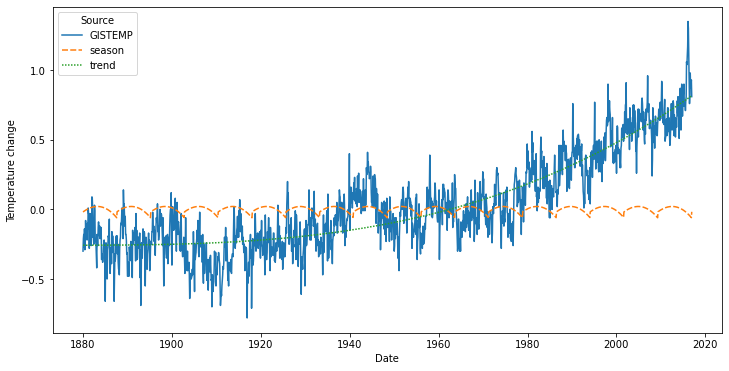

In [19]:
#plot seasonality and trend on top of our global temperature increases
# Since trend can dominate over seasonality, before estimating seasonality, we remove the trend:

plt.figure(figsize=(12, 6))
temperatures['trend'] = get_trend(temperatures['GISTEMP'])
temperatures['season'] = get_season(temperatures['GISTEMP'] - temperatures['trend'])
sns.lineplot(data=temperatures[['GISTEMP', 'season', 'trend']])
plt.ylabel('Temperature change');